In [1]:
import json, os,sys
import numpy as np
sys.path.append('C:\\Users\\dell\\Desktop\\phasemapy')
from copy import deepcopy

In [2]:
import os
os.getcwd()

'C:\\Users\\dell\\Desktop\\phasemapy\\scripts_Cu-Fe-V-O'

In [3]:
sys.path

['C:\\Users\\dell\\Desktop\\phasemapy\\scripts_Cu-Fe-V-O',
 'C:\\Users\\dell\\anaconda3\\envs\\myPymatgen\\python37.zip',
 'C:\\Users\\dell\\anaconda3\\envs\\myPymatgen\\DLLs',
 'C:\\Users\\dell\\anaconda3\\envs\\myPymatgen\\lib',
 'C:\\Users\\dell\\anaconda3\\envs\\myPymatgen',
 '',
 'C:\\Users\\dell\\anaconda3\\envs\\myPymatgen\\lib\\site-packages',
 'C:\\Users\\dell\\anaconda3\\envs\\myPymatgen\\lib\\site-packages\\lmptools-0.1.0-py3.7.egg',
 'C:\\Users\\dell\\anaconda3\\envs\\myPymatgen\\lib\\site-packages\\emmet_core-0.34.5-py3.7.egg',
 'C:\\Users\\dell\\anaconda3\\envs\\myPymatgen\\lib\\site-packages\\win32',
 'C:\\Users\\dell\\anaconda3\\envs\\myPymatgen\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\dell\\anaconda3\\envs\\myPymatgen\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\dell\\anaconda3\\envs\\myPymatgen\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\dell\\.ipython',
 'C:\\Users\\dell\\Desktop\\phasemapy']

In [4]:
!dir

 驱动器 C 中的卷没有标签。
 卷的序列号是 346F-7C10

 C:\Users\dell\Desktop\phasemapy\scripts_Cu-Fe-V-O 的目录

2022/09/16  11:07    <DIR>          .
2022/09/09  20:15    <DIR>          ..
2022/04/19  04:53             6,148 .DS_Store
2022/09/16  09:55    <DIR>          .ipynb_checkpoints
2022/09/16  11:29    <DIR>          clean_ipynb
2022/09/05  16:23    <DIR>          data
2022/05/18  06:51               186 environment.yaml
2022/09/05  16:23    <DIR>          initial_pruning
2022/09/16  10:42           144,823 Instance_data_9samples_near_volcano.ipynb
2022/05/14  05:11            13,831 PDF_Card_01-080-6417_SnO2.xy
2022/04/21  15:08            67,321 refinement.ipynb
2022/09/16  11:06            96,048 samples_near_volcano.npy
2022/05/14  05:11            71,653 samples_near_volcano.xy
2022/09/14  20:42           114,457 samples_near_volcano_sno2.npy
2022/09/15  12:17    <DIR>          solution
2022/09/05  15:48    <DIR>          solution_figures
2022/09/16  11:07         1,158,135 solver_Cu-fe-V-Copy1

In [5]:
!dir data

 驱动器 C 中的卷没有标签。
 卷的序列号是 346F-7C10

 C:\Users\dell\Desktop\phasemapy\scripts_Cu-Fe-V-O\data 的目录

2022/09/05  16:23    <DIR>          .
2022/09/16  11:07    <DIR>          ..
2022/04/19  04:53             6,148 .DS_Store
2022/02/21  15:55            14,868 3577_CuFeV_compositions.csv
2022/02/21  15:55         3,686,692 Fe-Cu-V-609-Q666-inst_with28.txt
2022/05/06  20:41         8,806,997 Fe-Cu-V-O-raw_background.txt
2022/09/05  16:23    <DIR>          icdd
2022/06/07  17:17         1,264,567 icdd_entries.json
2022/04/21  16:38             3,717 kainotropite.cif
2022/02/21  15:55            10,638 pdfnames_list.txt
2022/02/21  15:55            11,649 pdfnames_list_normalizedComps.csv
2022/04/26  15:42        16,292,974 raw_data_Fe_Cu_V.txt
2022/05/18  08:49             1,110 SnO2_mp-856_symmetrized.cif
2022/02/21  15:55           364,014 VFeCuO_20200615174936.sticks
              11 个文件     30,463,374 字节
               3 个目录 346,478,538,752 可用字节


In [105]:
from pymatgen.core import Element
from monty.json import MontyDecoder, MontyEncoder
from pymatgen.analysis.diffraction.xrd import XRDCalculator
import numpy as np
from phasemapy.dataio import InstanceData
from phasemapy.parser import ICDDEntry
from phasemapy.solver import Phase, Sample
import matplotlib.pyplot as plt
chemsys = ['Cu', 'Fe', 'V']
oxide_system = True
photon_e = 13e3
max_q_shift = 0.05
resample_density = 1000
initial_alphagamma = 0.1
SUM_NORM = 6000

# instance_data = InstanceData.from_file('./data/Fe-Cu-V-O-raw_background.txt', chemsys, photon_e)

instance_data = InstanceData.from_file('./data/Fe-Cu-V-O-raw_background.txt', chemsys, photon_e)
#./data/Fe-Cu-V-609-Q666-inst_with28.txt
#instance_data = instance_data.resample_xrd(resample_density)


In [431]:
loss_weight = {'xrd_loss': 6.0, 'comp_loss': 2.0, 'entropy_loss': 0.1}

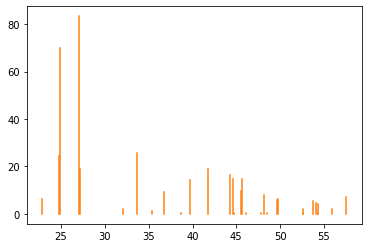

In [549]:
for q,amp in zip(entries[1].data['xrd'][0],entries[1].data['xrd'][1]):
#     plt.plot([q,q],[0,amp],c='C0')
    plt.plot([q,q],[0,amp],c='C1')

In [573]:
instance_data.wavelength

0.9537246033323097

In [578]:
instance_data.comp_dict

{'V': array([0.604 , 0.613 , 0.617 , 0.624 , 0.626 , 0.627 , 0.626 , 0.625 ,
        0.623 , 0.619 , 0.611 , 0.557 , 0.567 , 0.576 , 0.582 , 0.59  ,
        0.594 , 0.597 , 0.597 , 0.6   , 0.598 , 0.595 , 0.591 , 0.588 ,
        0.575 , 0.569 , 0.521 , 0.531 , 0.543 , 0.55  , 0.554 , 0.563 ,
        0.57  , 0.569 , 0.572 , 0.571 , 0.57  , 0.569 , 0.567 , 0.56  ,
        0.555 , 0.545 , 0.537 , 0.475 , 0.488 , 0.499 , 0.507 , 0.519 ,
        0.525 , 0.529 , 0.535 , 0.54  , 0.54  , 0.542 , 0.54  , 0.538 ,
        0.535 , 0.532 , 0.523 , 0.515 , 0.508 , 0.493 , 0.429 , 0.44  ,
        0.452 , 0.465 , 0.477 , 0.487 , 0.493 , 0.497 , 0.501 , 0.507 ,
        0.51  , 0.511 , 0.512 , 0.507 , 0.503 , 0.5   , 0.492 , 0.484 ,
        0.478 , 0.467 , 0.457 , 0.38  , 0.394 , 0.408 , 0.423 , 0.435 ,
        0.444 , 0.452 , 0.459 , 0.467 , 0.469 , 0.475 , 0.478 , 0.477 ,
        0.479 , 0.477 , 0.474 , 0.471 , 0.465 , 0.456 , 0.45  , 0.438 ,
        0.429 , 0.416 , 0.335 , 0.348 , 0.365 , 0.376 , 0.3

In [585]:
entries[0].empirical_formula

'Cu2 O7 V2'

In [581]:
entries[0]


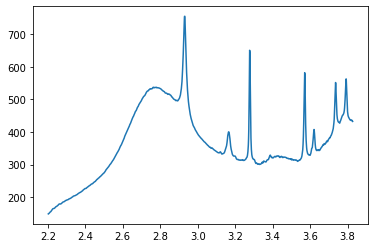

In [111]:
background = np.min(instance_data.sample_xrd,axis=0)
plt.plot(instance_data.log_q,background)

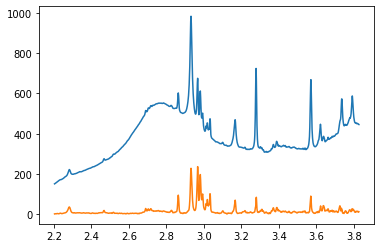

In [112]:
plt.plot(instance_data.log_q,instance_data.sample_xrd[12])
plt.plot(instance_data.log_q,instance_data.sample_xrd[12]-background)

In [574]:
instance_data.sample_xrd

array([[0.754268, 1.018204, 0.870377, ..., 3.558331, 3.122415, 2.909695],
       [0.838498, 0.966812, 0.787434, ..., 3.092385, 3.203941, 3.002827],
       [0.882091, 1.158848, 0.745739, ..., 3.323111, 3.07704 , 2.987007],
       ...,
       [0.990311, 1.29632 , 1.261368, ..., 4.967009, 4.72068 , 4.510729],
       [1.124633, 1.28652 , 1.365514, ..., 4.387835, 4.323132, 4.167222],
       [0.780906, 1.13614 , 1.374527, ..., 3.979112, 3.692661, 3.791828]])

In [575]:
instance_data.log_q

array([2.202742, 2.206139, 2.209525, ..., 3.826086, 3.826757, 3.827428])

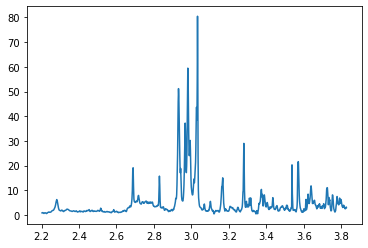

In [117]:
plt.plot(instance_data.log_q,instance_data.sample_xrd[1])

In [118]:
with open('./data/icdd_entries.json') as f:
    entries = json.load(f, cls=MontyDecoder)
print(len(entries))

77


In [119]:
entries[1].data

{'xrd': [array([22.831466, 24.821012, 24.90142 , 27.027991, 27.183404, 32.0457  ,
         33.677247, 35.324072, 36.690133, 38.732241, 39.697396, 41.73505 ,
         44.297274, 44.581656, 44.711864, 45.531408, 45.662932, 46.137755,
         47.790571, 48.154115, 48.472215, 49.642024, 49.80284 , 52.271903,
         52.550373, 52.580826, 53.743787, 54.055982, 54.281932, 54.366809,
         55.947352, 56.035654, 56.625697, 56.68869 , 57.553562]),
  array([ 6.459741, 24.245193, 69.835914, 83.315302, 18.876823,  1.881743,
         25.811902,  1.255663,  9.134277,  0.56093 , 14.14403 , 18.786812,
         16.535047, 14.66603 ,  0.436608,  9.693677, 14.735003,  0.252467,
          0.321928,  7.9335  ,  0.201731,  6.034838,  6.295061,  0.145265,
          2.25796 ,  0.212224,  5.464297,  4.8113  ,  0.186794,  4.383035,
          1.870918,  0.110813,  0.159902,  0.01756 ,  7.262049])]}

In [120]:
entries[1].pressure_temperature


'Ambient'

In [121]:
chemsys[0]

'Cu'

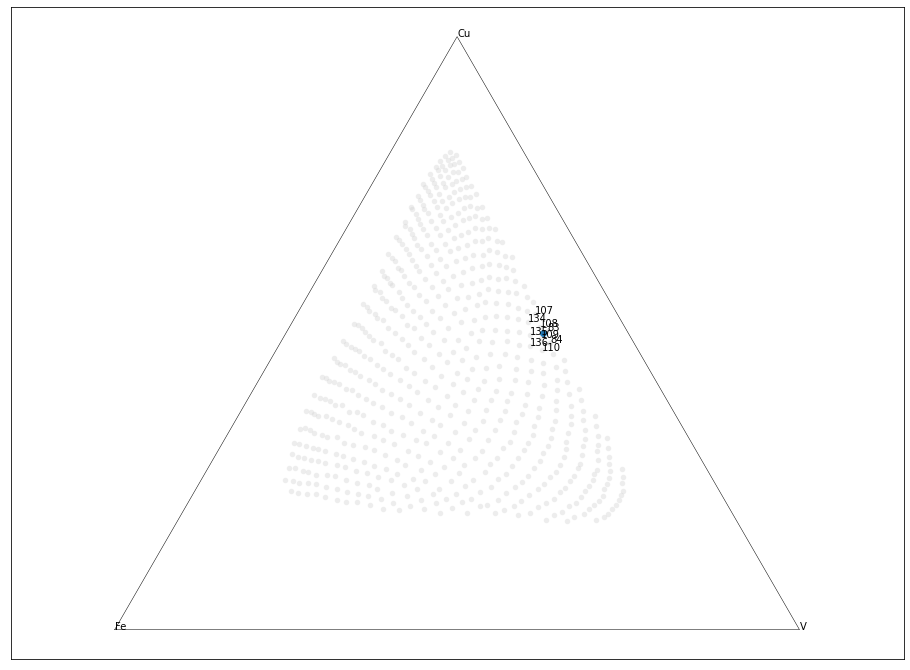

In [122]:
def get_plot(instance_data, sequence):
    chemsys = instance_data.chemsys
    i, j = chemsys.index(sequence[-1]), chemsys.index(sequence[0])
    unitvec = np.array([[1, 0], [0.5, np.sqrt(3) / 2]])
    x, y = np.dot(instance_data.sample_comp[:, (i, j)], unitvec).T
    fig = plt.figure(figsize=(8*2,6*2))
    ax = plt.subplot()
    comp = entries[-1].composition
    vacalno_comp = np.array([comp[Element(chemsys[2])],comp[Element(chemsys[0])]])/(comp.num_atoms-comp[Element('O')])
    vacalno_loc = np.dot(vacalno_comp, unitvec).T

    
    ax.scatter(x, y, s=30, c='lightgrey', alpha=0.4, lw=0)
#         label = ge.name + '\n' + ge.entry_id
#         phase_amt = act.phase_amount_matrix[:, i]
#         ax.scatter(x, y, s=30 * phase_amt, c=f'C{i}', lw=0, label=label)
    ax.plot([0, 1, 0.5, 0], [0, 0, np.sqrt(3) / 2, 0], 'k', lw=0.5)
    ax.axis('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    
    
    mid_loc = np.dot(np.array([1/3,1/3]),unitvec).T
    
    
#     for k in [0,193,485,65,67,327,542,224]:
#         ax.scatter()
    
    nn = []
    for k in range(instance_data.sample_num):
        #if (x[k]-mid_loc[0])**2+(y[k]-mid_loc[1])**2<0.002:
        if (x[k]-vacalno_loc[0])**2+(y[k]-vacalno_loc[1])**2<0.001:
            ax.text(x[k],y[k],str(k))
            nn.append(k)
#         ax.text(0.65, 0.7, label)
#         comp_v = np.array([ge.composition[Element(el)] for el in sequence])
#         comp_v /= np.sum(comp_v)

#         comp_v = np.array([comp_v[-1], comp_v[0]])
#         x0, y0 = np.dot(comp_v, unitvec).T
    ax.text(1, 0, sequence[-1])
    ax.text(0, 0, sequence[1])
    ax.text(0.5, np.sqrt(3) / 2, sequence[0])
    
        
    plt.scatter(*np.dot(vacalno_comp, unitvec).T)# Cu4FeV3

    return nn


nn = get_plot(instance_data,chemsys)








In [123]:
nn

[83, 84, 107, 108, 109, 110, 134, 135, 136]

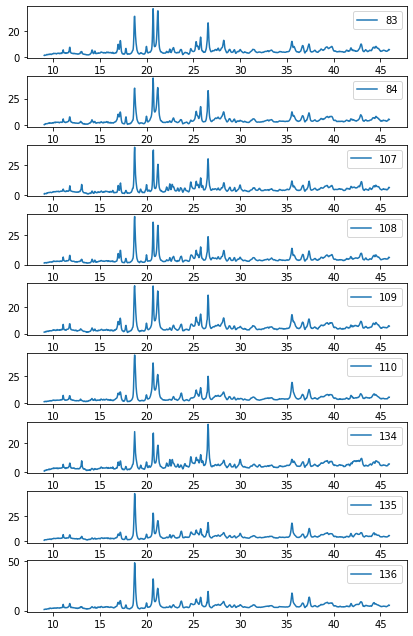

In [124]:
#nn = [62, 63, 83, 84, 85, 86, 106, 107, 108, 109, 110, 111, 112, 132, 133, 134, 135, 136, 137, 138, 159, 160, 161, 162, 163, 164, 165, 188, 189, 190, 191, 192, 218]

fig,axes = plt.subplots(ncols=1,nrows=len(nn),figsize=(6,len(nn)))
plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, \
    wspace=None, hspace=0.35)
for k,ax in zip(nn,axes):
    ax.plot(np.exp(instance_data.log_q), instance_data.sample_xrd[k],'-',label=str(k))
#     ax.plot(instance_data.log_q,background*0.05)
    ax.legend()
    
    

In [125]:
samples_near_volcano_sno2= np.load('samples_near_volcano_sno2.npy',allow_pickle=True).tolist()


In [477]:
entry[75].data['xrd']

NameError: name 'entry' is not defined

In [127]:
np.exp(instance_data.log_q)

array([ 9.04979,  9.08059,  9.11139, ..., 45.8826 , 45.9134 , 45.9442 ])

In [128]:
instance_data.q

array([ 9.04979,  9.08059,  9.11139, ..., 45.8826 , 45.9134 , 45.9442 ])

In [129]:
print(samples_near_volcano_sno2[0])

[ 8.064317  8.092502  8.120687 ... 41.74539  41.77358  41.80176 ]


In [130]:
print(samples_near_volcano_sno2[-2])

[14.    14.025 14.05  ... 41.75  41.775 41.8  ]


In [131]:
# samples_near_volcano = []
for i in range(10):
    amps_9sample_sno2[i]=list(amps_9sample_sno2[i])
    amps_9sample_sno2[i].append(last_row[i])
samples_near_volcano = amps_9sample_sno2[0:10]

In [516]:
entries[68].entry_id

'04-007-2512'

In [133]:
samples_near_volcano=np.array(samples_near_volcano)
np.save('samples_near_volcano.npy',samples_near_volcano) #保存为npy格式

C:\Users\dell\anaconda3\envs\myPymatgen\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [576]:
instance_data.comp_dict

{'V': array([0.604 , 0.613 , 0.617 , 0.624 , 0.626 , 0.627 , 0.626 , 0.625 ,
        0.623 , 0.619 , 0.611 , 0.557 , 0.567 , 0.576 , 0.582 , 0.59  ,
        0.594 , 0.597 , 0.597 , 0.6   , 0.598 , 0.595 , 0.591 , 0.588 ,
        0.575 , 0.569 , 0.521 , 0.531 , 0.543 , 0.55  , 0.554 , 0.563 ,
        0.57  , 0.569 , 0.572 , 0.571 , 0.57  , 0.569 , 0.567 , 0.56  ,
        0.555 , 0.545 , 0.537 , 0.475 , 0.488 , 0.499 , 0.507 , 0.519 ,
        0.525 , 0.529 , 0.535 , 0.54  , 0.54  , 0.542 , 0.54  , 0.538 ,
        0.535 , 0.532 , 0.523 , 0.515 , 0.508 , 0.493 , 0.429 , 0.44  ,
        0.452 , 0.465 , 0.477 , 0.487 , 0.493 , 0.497 , 0.501 , 0.507 ,
        0.51  , 0.511 , 0.512 , 0.507 , 0.503 , 0.5   , 0.492 , 0.484 ,
        0.478 , 0.467 , 0.457 , 0.38  , 0.394 , 0.408 , 0.423 , 0.435 ,
        0.444 , 0.452 , 0.459 , 0.467 , 0.469 , 0.475 , 0.478 , 0.477 ,
        0.479 , 0.477 , 0.474 , 0.471 , 0.465 , 0.456 , 0.45  , 0.438 ,
        0.429 , 0.416 , 0.335 , 0.348 , 0.365 , 0.376 , 0.3

In [135]:
amps_9sample_sno2[1] = list(amps_9sample_sno2[1])
amps_9sample_sno2[1].append(amps_9sample_sno2[1][1197])


In [136]:
amps_9sample_sno2[1][1198]

6.32

In [137]:
len(instance_data.sample_xrd[83])

1199

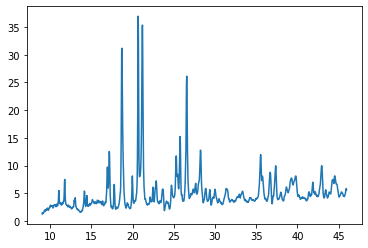

In [138]:
k=83
#plt.figure(figsize=(8,6))
plt.plot(np.exp(instance_data.log_q), instance_data.sample_xrd[k],'-')
# plt.plot(np.exp(instance_data.log_q),instance_data.sample_xrd[k]-background/78)

In [139]:
solution = [Phase.from_entry_and_instance_data(entries[69], 1, instance_data),]
# solution.append([Phase.from_entry_and_instance_data(entries[-1], 1, instance_data),])

sample = Sample(k, instance_data.log_q, instance_data.sample_xrd[k], instance_data.chemsys,
                        instance_data.sample_comp[k], oxide_system, instance_data.wavelength, max_q_shift, solution)


In [154]:
from pymatgen.core import Element, Composition

In [502]:
InstanceData

'Cu0.504Fe0.116V0.38'

In [511]:
Composition("Fe2O3").get_el_amt_dict()

defaultdict(float, {'Fe': 2.0, 'O': 3.0})

In [499]:
qs = entries[75].data['xrd'][0]
amps = entries[75].data['xrd'][1]

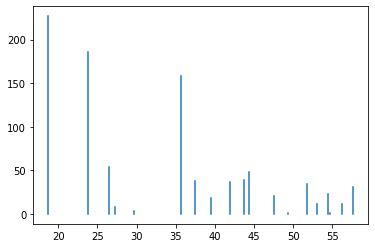

In [500]:
for q,amp in zip(qs,amps):
    plt.plot([q,q],[0,amp],c='C0')

In [484]:
entries[75].data['xrd'][1]

array([226.722485, 185.549052,  53.656718,   8.426851,   2.969536,
       158.349601,  38.156408,  18.791125,  36.852148,   0.313899,
        38.549   ,  48.296839,   0.472712,  20.65435 ,   0.099384,
         0.644836,  34.252603,  10.845982,  23.23076 ,   0.485097,
        11.371686,  30.578647])

In [198]:
instance_data.chemsys

['Cu', 'Fe', 'V']

In [305]:
a = f'Cu{instance_data.sample_comp[83][0]}Fe{instance_data.sample_comp[83][1]}V{instance_data.sample_comp[83][2]}'
a

'Cu0.504Fe0.116V0.38'

In [306]:
entries[75].name = a

In [307]:
entries[75].name

'Cu0.504Fe0.116V0.38'

In [163]:
basis_comp = np.array([[Composition(e.name)[el] for el in sample.chemsys] for e in entries])

In [43]:
d[0].composition

array([0.504, 0.116, 0.38 ])

<module 'matplotlib.pyplot' from 'C:\\Users\\dell\\anaconda3\\envs\\myPymatgen\\lib\\site-packages\\matplotlib\\pyplot.py'>

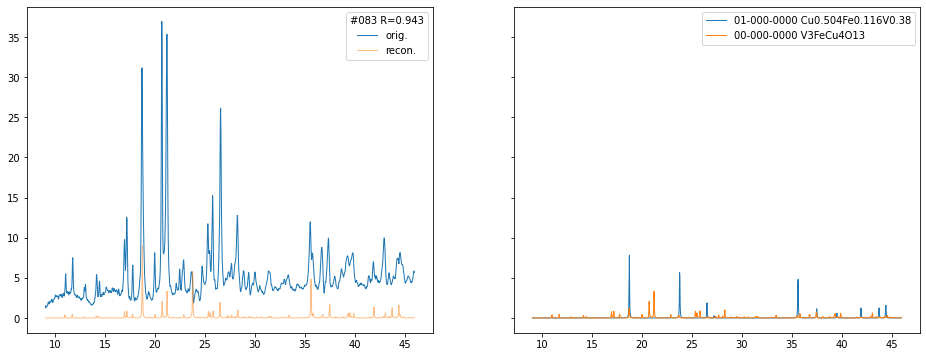

In [308]:
sample.plot(perphase=True)

In [ ]:
# def remove_negative():
#     for k in range(instance_data.sample_num):
#         #print (np.max(instance_data.sample_xrd[k]))
#         threshold = 0.002*np.max(instance_data.sample_xrd[k])
#         intensity = instance_data.sample_xrd[k]
#         while np.min(intensity)<threshold:
#             center_log_q = instance_data.log_q[np.argmin(instance_data.sample_xrd[k])]
#             sigma=0.1
#             gaussian = (threshold-np.min(intensity))* np.exp(-np.power((instance_data.log_q - center_log_q)/sigma, 2.)/2.)
#             #plt.plot(instance_data.log_q,gaussian)
#             intensity += gaussian
        
# remove_negative()                                      
    #plt.plot(np.exp(instance_data.log_q), intensity)


In [ ]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [ ]:

plt.plot(instance_data.log_q, instance_data.sample_xrd[k],'-')
points = np.array([instance_data.log_q, instance_data.sample_xrd[k]]).T
hull = ConvexHull(points)
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')


In [ ]:
chemsys

In [ ]:
#np.dot(np.array(, unitvec).T

In [ ]:
# plt.figure(figsize=(8*2,6*2))
# instance_data1 = InstanceData.from_file('./data/raw_data_Fe_Cu_V.txt', chemsys, photon_e)
# k=290

# plt.plot(np.exp(instance_data1.log_q), instance_data1.sample_xrd[k]/np.max(instance_data1.sample_xrd[k]),'o-')


# instance_data2 = InstanceData.from_file('./data/Fe-Cu-V-609-Q666-inst_with28.txt', chemsys, photon_e)

# plt.plot(np.exp(instance_data2.log_q), instance_data2.sample_xrd[k],'o-')



In [317]:
entries[75].composition

Comp: Sn1 O2

In [309]:
entries[75].common_name = entries[75].name
print(f'entries[75].common_name:{entries[75].common_name}')


entries[75].common_name:Cu0.504Fe0.116V0.38


In [319]:
entries[75].common_name

'Cu0.504Fe0.116V0.38'

In [320]:
entries[75].composition

Comp: Sn1 O2

In [324]:
entries[75].data
entries[75].empirical_formula = entries[75].common_name
entries[75].empirical_formula 

'Cu0.504Fe0.116V0.38'

In [328]:
entries[75].composition = entries[76].composition
entries[75].composition

Comp: V3 Fe1 Cu4 O13

In [ ]:
#     def prune_candidates_based_on_composition(self, cutoff=0.05):
#         basis_comp = np.array([[e.composition[Element(el)] for el in self.chemsys] for e in self.entries])
#         basis_comp /= np.sum(basis_comp, axis=1, keepdims=True)
#         diff = basis_comp - self.composition
#         ratio = self.composition[np.argmax(diff, axis=1)] / (
#                 np.max(diff, axis=1) + self.composition[np.argmax(diff, axis=1)])

#         self.solution = [self.solution[i] for i in range(len(ratio)) if ratio[i] > cutoff]
#         return

In [424]:
instance_data.renormalize(norm=SUM_NORM)

In [467]:
i=83
solution = []
for e in (entries[75],entries[76]):
    phase = Phase.from_entry_and_instance_data(e, 1 / len(entries), instance_data)
    solution.append(phase)
     
# solution = [Phase.from_entry_and_instance_data(entries[-1], 1, instance_data,width=0.1)]    

sample = Sample(i, instance_data.log_q, instance_data.sample_xrd[i], instance_data.chemsys,
                 instance_data.sample_comp[i], oxide_system, instance_data.wavelength, max_q_shift, solution)
# sample.prune_candidates_based_on_composition(cutoff=0.05)

<module 'matplotlib.pyplot' from 'C:\\Users\\dell\\anaconda3\\envs\\myPymatgen\\lib\\site-packages\\matplotlib\\pyplot.py'>

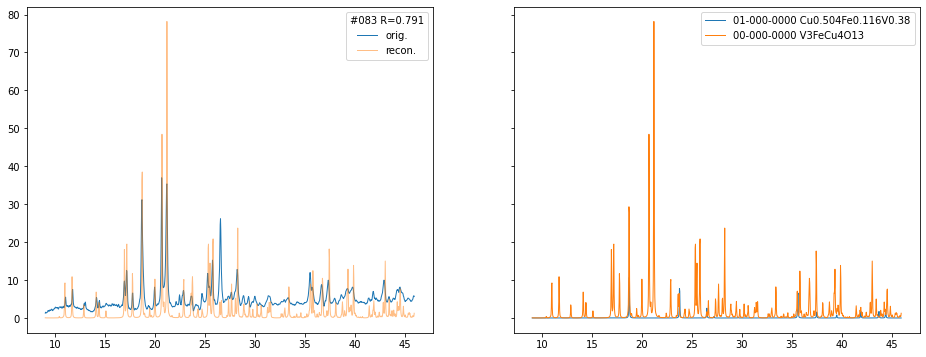

In [468]:
sample.refine_all_fractions()
# sample.refine_one_by_one()
sample.plot(perphase=True)

In [440]:
with open('data_vocalno_instance.json') as f:
    vocalno_instance_data = json.load(f, cls=MontyDecoder)

In [463]:
# sample = Sample(i, instance_data.log_q, instance_data.sample_xrd[i], instance_data.chemsys,
#                  instance_data.sample_comp[i], oxide_system, instance_data.wavelength, max_q_shift, solution)
sample = Sample(i, instance_data.log_q, np.array(vocalno_instance_data[0]['instance_info']['instance_xrd']), instance_data.chemsys,
                 np.array(vocalno_instance_data[0]['instance_info']['instance_comp']), oxide_system, np.array(vocalno_instance_data[0]['instance_info']['wavelength']), max_q_shift, solution)

<module 'matplotlib.pyplot' from 'C:\\Users\\dell\\anaconda3\\envs\\myPymatgen\\lib\\site-packages\\matplotlib\\pyplot.py'>

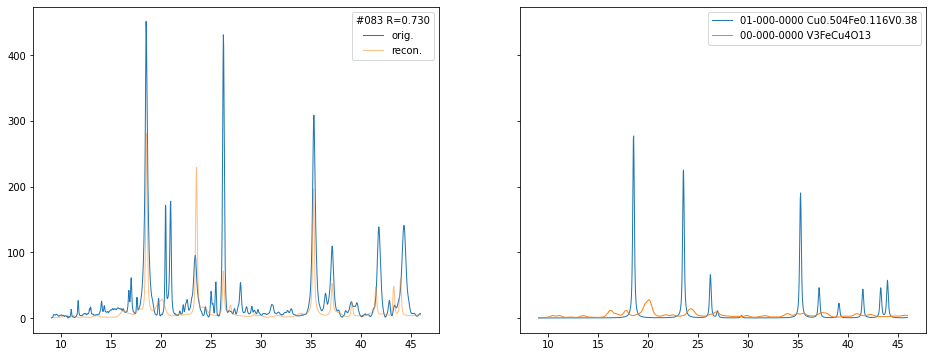

In [464]:
sample.refine_all_fractions()
# sample.refine_one_by_one()
sample.plot(perphase=True)

In [469]:
new_sample = deepcopy(sample)
        
new_sample = new_sample.optimize(num_epoch=500, print_prog=True, loss_weight=loss_weight)
# new_sample.update_solution(0.03, 0.2999, new_sample.max_q_shift)
# new_sample.print_solution()
# new_sample.plot(perphase=True)

# new_sample.refine_all_fractions()
# new_sample.refine_one_by_one()

x tensor([[0.5104, 0.4896]], grad_fn=<SumBackward1>)
entropy tensor([0.6929], grad_fn=<NegBackward0>) tensor(0.6929, grad_fn=<MeanBackward0>)
loss tensor(0.7463, grad_fn=<DivBackward0>) tensor(0.6929, grad_fn=<MeanBackward0>) tensor(7.1226e-05, grad_fn=<MseLossBackward0>)
0 4.547194 tensor(0.7463) tensor(7.1226e-05) tensor(0.6929)
x tensor([[0.3970, 0.6030]], grad_fn=<SumBackward1>)
entropy tensor([0.6718], grad_fn=<NegBackward0>) tensor(0.6718, grad_fn=<MeanBackward0>)
loss tensor(0.6284, grad_fn=<DivBackward0>) tensor(0.6718, grad_fn=<MeanBackward0>) tensor(8.5432e-05, grad_fn=<MseLossBackward0>)
x tensor([[0.3443, 0.6557]], grad_fn=<SumBackward1>)
entropy tensor([0.6439], grad_fn=<NegBackward0>) tensor(0.6439, grad_fn=<MeanBackward0>)
loss tensor(0.6082, grad_fn=<DivBackward0>) tensor(0.6439, grad_fn=<MeanBackward0>) tensor(9.1371e-05, grad_fn=<MseLossBackward0>)
x tensor([[0.3070, 0.6930]], grad_fn=<SumBackward1>)
entropy tensor([0.6166], grad_fn=<NegBackward0>) tensor(0.6166, grad

x tensor([[0.1334, 0.8666]], grad_fn=<SumBackward1>)
entropy tensor([0.3929], grad_fn=<NegBackward0>) tensor(0.3929, grad_fn=<MeanBackward0>)
loss tensor(0.5622, grad_fn=<DivBackward0>) tensor(0.3929, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1342, 0.8658]], grad_fn=<SumBackward1>)
entropy tensor([0.3942], grad_fn=<NegBackward0>) tensor(0.3942, grad_fn=<MeanBackward0>)
loss tensor(0.5620, grad_fn=<DivBackward0>) tensor(0.3942, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1348, 0.8652]], grad_fn=<SumBackward1>)
entropy tensor([0.3954], grad_fn=<NegBackward0>) tensor(0.3954, grad_fn=<MeanBackward0>)
loss tensor(0.5617, grad_fn=<DivBackward0>) tensor(0.3954, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1353, 0.8647]], grad_fn=<SumBackward1>)
entropy tensor([0.3964], grad_fn=<NegBackward0>) tensor(0.3964, grad_fn=<MeanBackward0>)
loss tensor(0.5615, grad_fn=<DivBackward0>) tensor(

x tensor([[0.1322, 0.8678]], grad_fn=<SumBackward1>)
entropy tensor([0.3905], grad_fn=<NegBackward0>) tensor(0.3905, grad_fn=<MeanBackward0>)
loss tensor(0.5586, grad_fn=<DivBackward0>) tensor(0.3905, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1323, 0.8677]], grad_fn=<SumBackward1>)
entropy tensor([0.3906], grad_fn=<NegBackward0>) tensor(0.3906, grad_fn=<MeanBackward0>)
loss tensor(0.5586, grad_fn=<DivBackward0>) tensor(0.3906, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1323, 0.8677]], grad_fn=<SumBackward1>)
entropy tensor([0.3908], grad_fn=<NegBackward0>) tensor(0.3908, grad_fn=<MeanBackward0>)
loss tensor(0.5586, grad_fn=<DivBackward0>) tensor(0.3908, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1323, 0.8677]], grad_fn=<SumBackward1>)
entropy tensor([0.3907], grad_fn=<NegBackward0>) tensor(0.3907, grad_fn=<MeanBackward0>)
loss tensor(0.5586, grad_fn=<DivBackward0>) tensor(

x tensor([[0.1294, 0.8706]], grad_fn=<SumBackward1>)
entropy tensor([0.3853], grad_fn=<NegBackward0>) tensor(0.3853, grad_fn=<MeanBackward0>)
loss tensor(0.5583, grad_fn=<DivBackward0>) tensor(0.3853, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1295, 0.8705]], grad_fn=<SumBackward1>)
entropy tensor([0.3854], grad_fn=<NegBackward0>) tensor(0.3854, grad_fn=<MeanBackward0>)
loss tensor(0.5583, grad_fn=<DivBackward0>) tensor(0.3854, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1295, 0.8705]], grad_fn=<SumBackward1>)
entropy tensor([0.3854], grad_fn=<NegBackward0>) tensor(0.3854, grad_fn=<MeanBackward0>)
loss tensor(0.5583, grad_fn=<DivBackward0>) tensor(0.3854, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1295, 0.8705]], grad_fn=<SumBackward1>)
entropy tensor([0.3854], grad_fn=<NegBackward0>) tensor(0.3854, grad_fn=<MeanBackward0>)
loss tensor(0.5583, grad_fn=<DivBackward0>) tensor(

entropy tensor([0.3850], grad_fn=<NegBackward0>) tensor(0.3850, grad_fn=<MeanBackward0>)
loss tensor(0.5582, grad_fn=<DivBackward0>) tensor(0.3850, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1293, 0.8707]], grad_fn=<SumBackward1>)
entropy tensor([0.3851], grad_fn=<NegBackward0>) tensor(0.3851, grad_fn=<MeanBackward0>)
loss tensor(0.5582, grad_fn=<DivBackward0>) tensor(0.3851, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1293, 0.8707]], grad_fn=<SumBackward1>)
entropy tensor([0.3851], grad_fn=<NegBackward0>) tensor(0.3851, grad_fn=<MeanBackward0>)
loss tensor(0.5582, grad_fn=<DivBackward0>) tensor(0.3851, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1293, 0.8707]], grad_fn=<SumBackward1>)
entropy tensor([0.3851], grad_fn=<NegBackward0>) tensor(0.3851, grad_fn=<MeanBackward0>)
loss tensor(0.5582, grad_fn=<DivBackward0>) tensor(0.3851, grad_fn=<MeanBackward0>) tensor(0.0001, grad_

x tensor([[0.1293, 0.8707]], grad_fn=<SumBackward1>)
entropy tensor([0.3850], grad_fn=<NegBackward0>) tensor(0.3850, grad_fn=<MeanBackward0>)
loss tensor(0.5582, grad_fn=<DivBackward0>) tensor(0.3850, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1293, 0.8707]], grad_fn=<SumBackward1>)
entropy tensor([0.3850], grad_fn=<NegBackward0>) tensor(0.3850, grad_fn=<MeanBackward0>)
loss tensor(0.5582, grad_fn=<DivBackward0>) tensor(0.3850, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1293, 0.8707]], grad_fn=<SumBackward1>)
entropy tensor([0.3850], grad_fn=<NegBackward0>) tensor(0.3850, grad_fn=<MeanBackward0>)
loss tensor(0.5582, grad_fn=<DivBackward0>) tensor(0.3850, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1293, 0.8707]], grad_fn=<SumBackward1>)
entropy tensor([0.3850], grad_fn=<NegBackward0>) tensor(0.3850, grad_fn=<MeanBackward0>)
loss tensor(0.5582, grad_fn=<DivBackward0>) tensor(

loss tensor(0.5582, grad_fn=<DivBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1292, 0.8708]], grad_fn=<SumBackward1>)
entropy tensor([0.3849], grad_fn=<NegBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>)
loss tensor(0.5582, grad_fn=<DivBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1292, 0.8708]], grad_fn=<SumBackward1>)
entropy tensor([0.3849], grad_fn=<NegBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>)
loss tensor(0.5582, grad_fn=<DivBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1292, 0.8708]], grad_fn=<SumBackward1>)
entropy tensor([0.3849], grad_fn=<NegBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>)
loss tensor(0.5582, grad_fn=<DivBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1292, 0.8708]], grad_fn=<SumBackward1>)
entropy tenso

x tensor([[0.1292, 0.8708]], grad_fn=<SumBackward1>)
entropy tensor([0.3849], grad_fn=<NegBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>)
loss tensor(0.5582, grad_fn=<DivBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1292, 0.8708]], grad_fn=<SumBackward1>)
entropy tensor([0.3849], grad_fn=<NegBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>)
loss tensor(0.5582, grad_fn=<DivBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1292, 0.8708]], grad_fn=<SumBackward1>)
entropy tensor([0.3849], grad_fn=<NegBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>)
loss tensor(0.5582, grad_fn=<DivBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1292, 0.8708]], grad_fn=<SumBackward1>)
entropy tensor([0.3849], grad_fn=<NegBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>)
loss tensor(0.5582, grad_fn=<DivBackward0>) tensor(

x tensor([[0.1292, 0.8708]], grad_fn=<SumBackward1>)
entropy tensor([0.3849], grad_fn=<NegBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>)
loss tensor(0.5581, grad_fn=<DivBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1292, 0.8708]], grad_fn=<SumBackward1>)
entropy tensor([0.3849], grad_fn=<NegBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>)
loss tensor(0.5581, grad_fn=<DivBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1292, 0.8708]], grad_fn=<SumBackward1>)
entropy tensor([0.3849], grad_fn=<NegBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>)
loss tensor(0.5581, grad_fn=<DivBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1292, 0.8708]], grad_fn=<SumBackward1>)
entropy tensor([0.3849], grad_fn=<NegBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>)
loss tensor(0.5581, grad_fn=<DivBackward0>) tensor(

x tensor([[0.1292, 0.8708]], grad_fn=<SumBackward1>)
entropy tensor([0.3849], grad_fn=<NegBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>)
loss tensor(0.5581, grad_fn=<DivBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1292, 0.8708]], grad_fn=<SumBackward1>)
entropy tensor([0.3849], grad_fn=<NegBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>)
loss tensor(0.5581, grad_fn=<DivBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1292, 0.8708]], grad_fn=<SumBackward1>)
entropy tensor([0.3849], grad_fn=<NegBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>)
loss tensor(0.5581, grad_fn=<DivBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1292, 0.8708]], grad_fn=<SumBackward1>)
entropy tensor([0.3849], grad_fn=<NegBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>)
loss tensor(0.5581, grad_fn=<DivBackward0>) tensor(

entropy tensor([0.3849], grad_fn=<NegBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>)
loss tensor(0.5581, grad_fn=<DivBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1292, 0.8708]], grad_fn=<SumBackward1>)
entropy tensor([0.3849], grad_fn=<NegBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>)
loss tensor(0.5581, grad_fn=<DivBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1292, 0.8708]], grad_fn=<SumBackward1>)
entropy tensor([0.3849], grad_fn=<NegBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>)
loss tensor(0.5581, grad_fn=<DivBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1292, 0.8708]], grad_fn=<SumBackward1>)
entropy tensor([0.3849], grad_fn=<NegBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>)
loss tensor(0.5581, grad_fn=<DivBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>) tensor(0.0001, grad_

x tensor([[0.1292, 0.8708]], grad_fn=<SumBackward1>)
entropy tensor([0.3849], grad_fn=<NegBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>)
loss tensor(0.5581, grad_fn=<DivBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1292, 0.8708]], grad_fn=<SumBackward1>)
entropy tensor([0.3849], grad_fn=<NegBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>)
loss tensor(0.5581, grad_fn=<DivBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1292, 0.8708]], grad_fn=<SumBackward1>)
entropy tensor([0.3849], grad_fn=<NegBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>)
loss tensor(0.5581, grad_fn=<DivBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1292, 0.8708]], grad_fn=<SumBackward1>)
entropy tensor([0.3849], grad_fn=<NegBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>)
loss tensor(0.5581, grad_fn=<DivBackward0>) tensor(

loss tensor(0.5581, grad_fn=<DivBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1292, 0.8708]], grad_fn=<SumBackward1>)
entropy tensor([0.3849], grad_fn=<NegBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>)
loss tensor(0.5581, grad_fn=<DivBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1292, 0.8708]], grad_fn=<SumBackward1>)
entropy tensor([0.3849], grad_fn=<NegBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>)
loss tensor(0.5581, grad_fn=<DivBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1292, 0.8708]], grad_fn=<SumBackward1>)
entropy tensor([0.3849], grad_fn=<NegBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>)
loss tensor(0.5581, grad_fn=<DivBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1292, 0.8708]], grad_fn=<SumBackward1>)
entropy tenso

x tensor([[0.1292, 0.8708]], grad_fn=<SumBackward1>)
entropy tensor([0.3849], grad_fn=<NegBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>)
loss tensor(0.5581, grad_fn=<DivBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1292, 0.8708]], grad_fn=<SumBackward1>)
entropy tensor([0.3849], grad_fn=<NegBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>)
loss tensor(0.5581, grad_fn=<DivBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1292, 0.8708]], grad_fn=<SumBackward1>)
entropy tensor([0.3849], grad_fn=<NegBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>)
loss tensor(0.5581, grad_fn=<DivBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[0.1292, 0.8708]], grad_fn=<SumBackward1>)
entropy tensor([0.3849], grad_fn=<NegBackward0>) tensor(0.3849, grad_fn=<MeanBackward0>)
loss tensor(0.5581, grad_fn=<DivBackward0>) tensor(

In [471]:
new_sample.refine_all_fractions()

In [473]:
new_sample.refine_one_by_one()

<module 'matplotlib.pyplot' from 'C:\\Users\\dell\\anaconda3\\envs\\myPymatgen\\lib\\site-packages\\matplotlib\\pyplot.py'>

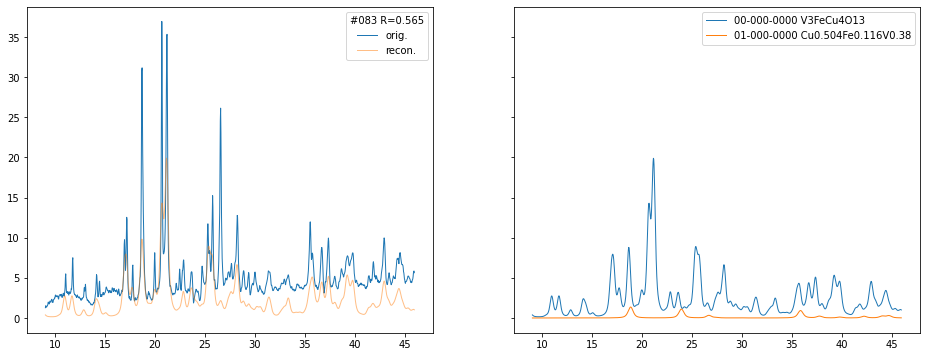

In [474]:
new_sample.plot(perphase=True)

In [365]:
new_sample.refine_all_fractions()
new_sample.refine_one_by_one()

<module 'matplotlib.pyplot' from 'C:\\Users\\dell\\anaconda3\\envs\\myPymatgen\\lib\\site-packages\\matplotlib\\pyplot.py'>

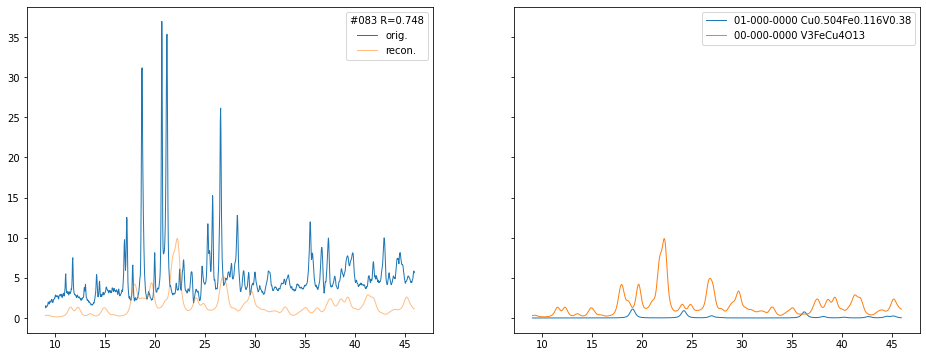

In [366]:
new_sample.plot(perphase=True)

<module 'matplotlib.pyplot' from 'C:\\Users\\dell\\anaconda3\\envs\\myPymatgen\\lib\\site-packages\\matplotlib\\pyplot.py'>

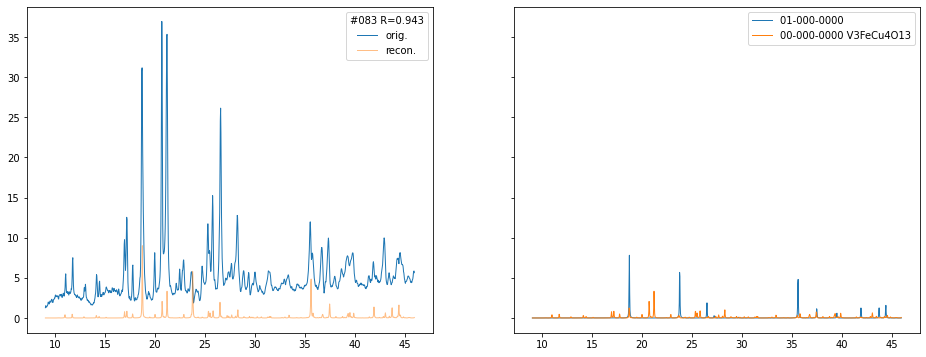

In [297]:
sample.plot(perphase=True)

In [579]:
Element('Cu')

Element Cu

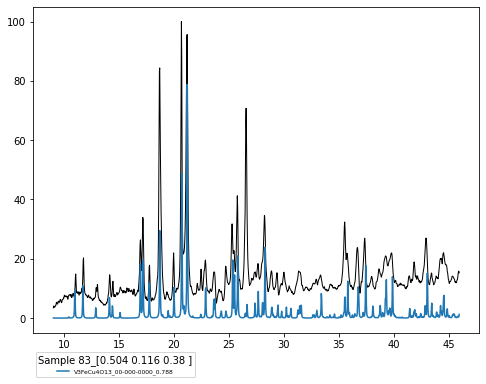

x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.7668, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
0 4.60078 tensor(0.7668) tensor(0.0001) tensor(1.1921e-07)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.7825, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.7483, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<

x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.7149, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.7142, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.7136, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.7129, grad_fn=<DivBackward0>) tensor(

x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.7003, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.7001, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6999, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6997, grad_fn=<DivBackward0>)

entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6967, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6967, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6967, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6967, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tens

x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6965, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6965, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6965, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6965, grad_fn=<DivBackward0>)

loss tensor(0.6964, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6964, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6964, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6964, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1

entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6963, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6963, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6963, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6963, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) 

x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6962, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6962, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6962, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6962, grad_fn=<DivBackward0>) tensor(

x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6962, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6962, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6962, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6962, grad_fn=<DivBackward0>) ten

x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6961, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6961, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6961, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6961, grad_fn=<DivBackward0>)

loss tensor(0.6961, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6961, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6961, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6961, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1

x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6961, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6961, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6961, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6961, grad_fn=<DivBackward0>) tensor(

x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6961, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6961, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6961, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6961, grad_fn=<DivBackward0>) tensor(

x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6961, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6961, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6961, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6961, grad_fn=<DivBackwar

x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6961, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6961, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6961, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(0.6961, grad_fn=<DivBackward0>) tensor(

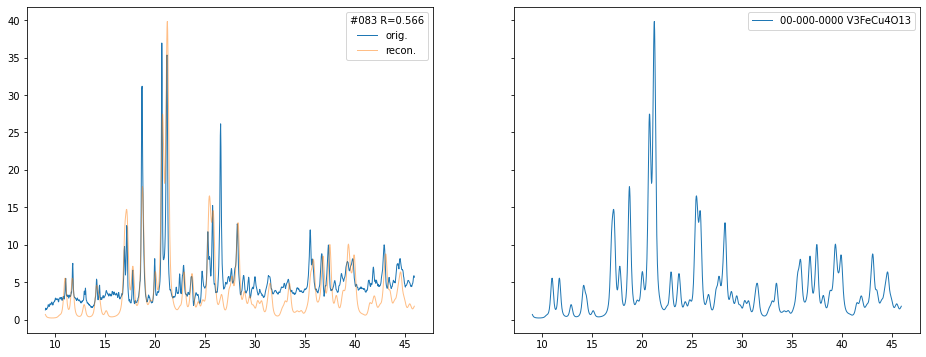

In [298]:
        i=83
        solution = []
        for e in entries:
            phase = Phase.from_entry_and_instance_data(e, 1 / len(entries), instance_data)
            solution.append(phase)
            
        solution = [Phase.from_entry_and_instance_data(entries[-1], 1, instance_data,width=0.1)]    

        sample = Sample(i, instance_data.log_q, instance_data.sample_xrd[i], instance_data.chemsys,
                        instance_data.sample_comp[i], oxide_system, instance_data.wavelength, max_q_shift, solution)
        sample.prune_candidates_based_on_composition(cutoff=0.05)
        sample.prune_candidate_based_on_xrd(plot=True, cutoff=0.08)
        new_sample = deepcopy(sample)
        
        new_sample = new_sample.optimize(num_epoch=500, print_prog=True, loss_weight=loss_weight)
        #new_sample.update_solution(0.03, 0.2999, new_sample.max_q_shift)
        new_sample.print_solution()
        new_sample.plot(perphase=True)
        
        new_sample.refine_all_fractions()
        new_sample.refine_one_by_one()
        

In [277]:
sample = Sample(83, instance_data.log_q, instance_data.sample_xrd[83], instance_data.chemsys,
                        instance_data.sample_comp[83], oxide_system, instance_data.wavelength, max_q_shift, solution)

In [278]:
entries[75].name = ''

In [279]:
entries[75]

In [280]:
!open initial_pruning/fig_83.pd

'open' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [586]:
for i in [83]: #range(instance_data.sample_num):
    solution_file = f'solution/samples{i}.json'
    if os.path.exists(solution_file):
        continue
        with open(solution_file) as f:
            sample = json.load(f, cls=MontyDecoder)
        continue
    else:
        print(f'Solving sample {i} ......')
        solution = [Phase.from_entry_and_instance_data(entries[-1], 1, instance_data,width=0.1)]
        
#         solution = []
#         for e in entries[76]:
#             phase = Phase.from_entry_and_instance_data(e, 1, instance_data)
#             solution.append(phase)

        sample = Sample(i, instance_data.log_q, instance_data.sample_xrd[i], instance_data.chemsys,
                        instance_data.sample_comp[i], oxide_system, instance_data.wavelength, max_q_shift, solution)
#         sample.prune_candidates_based_on_composition(cutoff=0.05)
#         sample.prune_candidate_based_on_xrd(plot=True, cutoff=0.1, saveplot=f'initial_pruning/fig_{i}.pdf')
        #sample.print_solution()
        
        
        if len(sample.solution)>0 and len(sample.solution)<30:
            print (sample.sample_id,len(sample.solution))
            solution_file = f'solution/samples{i}.json'
            with open(solution_file, 'w') as f:
                json.dump(sample, f, cls=MontyEncoder)
    
        
        
# #         print(sample.sample_id, sample.loss(loss_weight))
        
        new_sample = deepcopy(sample)
        
#         #new_sample.refine_all_fractions()
#         #new_sample.refine_one_by_one()
        
        new_sample = new_sample.optimize(num_epoch=500, print_prog=True, loss_weight=loss_weight)
        new_sample.update_solution(0.03, 0.2999, new_sample.max_q_shift)
        new_sample.refine_all_fractions()
        new_sample.refine_one_by_one()
        new_sample.update_solution(0.03, 0.2999, new_sample.max_q_shift)
        new_sample.print_solution()    
        #new_sample.refine_all_fractions()
#         new_sample = new_sample.optimize(num_epoch=1000, print_prog=True, loss_weight=loss_weight)
#         new_sample.update_solution(0.01, 0.2999, new_sample.max_q_shift)
#         new_sample.refine_one_by_one()
#         new_sample.refine_all_fractions()
#         new_sample.update_solution(0.01, 0.2999, new_sample.max_q_shift)
#        print(new_sample.loss(loss_weight))
#         if new_sample.loss(loss_weight) <= sample.loss(loss_weight):
#             #sample.print_solution()
#             new_sample.print_solution()
#             #samples[sample.sample_id] = new_sample
#             solution_file = f'solution/samples{i}.json'
#             with open(solution_file, 'w') as f:
#                 json.dump(new_sample, f, cls=MontyEncoder)
#             print(sample.sample_id, sample.loss(loss_weight))


Solving sample 83 ......
83 1
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.3746, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
0 8.2477665 tensor(1.3746) tensor(0.0001) tensor(1.1921e-07)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.2049, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.1472, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tens

entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0548, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0544, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0540, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0536, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tens

x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0471, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0470, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0469, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0467, grad_fn=<DivBackward0>) ten

x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0421, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0421, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0420, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0420, grad_fn=<DivBackward0>) tensor(1.19

x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0404, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0404, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0404, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0404, grad_fn=<DivBackward0>) ten

loss tensor(1.0403, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0403, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0403, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0403, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1

x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0403, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0403, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0403, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0403, grad_fn=<DivBackward0>) tensor(

loss tensor(1.0402, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0402, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0402, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0402, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy t

x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0402, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0402, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0402, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0402, grad_fn=<DivBackward0>) tensor(

x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0402, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0402, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0402, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0402, grad_fn=<DivBackward0>) ten

loss tensor(1.0402, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0402, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0402, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0402, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tenso

x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0402, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0402, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0402, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0402, grad_fn=<DivBackward0>)

entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0402, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0402, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0402, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tensor(0.0001, grad_fn=<MseLossBackward0>)
x tensor([[1.0000]], grad_fn=<SumBackward1>)
entropy tensor([1.1921e-07], grad_fn=<NegBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>)
loss tensor(1.0402, grad_fn=<DivBackward0>) tensor(1.1921e-07, grad_fn=<MeanBackward0>) tens

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ValueError: x and y must have same first dimension, but have shapes (1199,) and (1,)

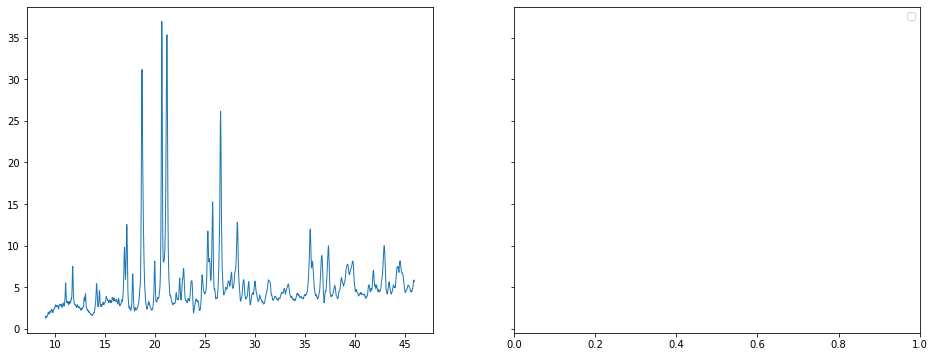

In [282]:
new_sample.plot(perphase=True)

In [ ]:
plt.plot(np.exp(instance_data.log_q),background)

In [ ]:
instance_data.sample_num

In [ ]:
for i in range(instance_data.sample_num):
    solution_file = f'solution/samples{i}.json'
    if os.path.exists(solution_file):
        with open(solution_file) as f:
            sample = json.load(f, cls=MontyDecoder)
            
        sample.plot(perphase=True)    
        print(f'Solving sample {i} ......') 
        
        if (len(sample.solution)) <1:
            #continue
            print (len(sample.solution))
            continue
        new_sample = deepcopy(sample)
        new_sample.refine_all_fractions()
        new_sample.refine_one_by_one()
        if new_sample.loss(loss_weight) <= sample.loss(loss_weight):
            new_sample.print_solution()
            solution_file = f'solution/samples{i}.json'
            with open(solution_file, 'w') as f:
                json.dump(new_sample, f, cls=MontyEncoder)
        
        
        new_sample = new_sample.optimize(num_epoch=500, print_prog=True, loss_weight=loss_weight)
        new_sample.update_solution(0.03, 0.2999, new_sample.max_q_shift)
        
        if (len(new_sample.solution)) <1:
            #continue
            print (len(new_sample.solution))
            continue
        
        
        new_sample.plot(perphase=True)
        
        new_sample.refine_all_fractions()
        new_sample.refine_one_by_one()
        new_sample.update_solution(0.03, 0.299, new_sample.max_q_shift)
        
        if new_sample.loss(loss_weight) <= sample.loss(loss_weight):
            new_sample.print_solution()
            solution_file = f'solution/samples{i}.json'
            with open(solution_file, 'w') as f:
                json.dump(new_sample, f, cls=MontyEncoder)
    else:
        continue
        
        
        #solution = [Phase.from_entry_and_instance_data(entries[-1], 1, instance_data,width=0.1)]
        
        
# #         print(sample.sample_id, sample.loss(loss_weight))
        
#         new_sample = deepcopy(sample)
        
#         #new_sample.refine_all_fractions()
#         #new_sample.refine_one_by_one()
        
#         new_sample = new_sample.optimize(num_epoch=500, print_prog=True, loss_weight=loss_weight)
#         new_sample.update_solution(0.03, 0.2999, new_sample.max_q_shift)
#         new_sample.refine_all_fractions()
#         new_sample.refine_one_by_one()
#         new_sample.update_solution(0.03, 0.2999, new_sample.max_q_shift)
#         #new_sample.refine_all_fractions()
# #         new_sample = new_sample.optimize(num_epoch=1000, print_prog=True, loss_weight=loss_weight)
# #         new_sample.update_solution(0.01, 0.2999, new_sample.max_q_shift)
# #         new_sample.refine_one_by_one()
# #         new_sample.refine_all_fractions()
# #         new_sample.update_solution(0.01, 0.2999, new_sample.max_q_shift)
# #        print(new_sample.loss(loss_weight))
#         if new_sample.loss(loss_weight) <= sample.loss(loss_weight):
#             #sample.print_solution()
#             new_sample.print_solution()
#             #samples[sample.sample_id] = new_sample
#             solution_file = f'solution/samples{i}.json'
#             with open(solution_file, 'w') as f:
#                 json.dump(new_sample, f, cls=MontyEncoder)
#             print(sample.sample_id, sample.loss(loss_weight))


In [ ]:
new_sample.print_solution()

In [ ]:
new_sample.plot(perphase=True)

In [ ]:
plt.plot(np.exp(instance_data.log_q),background)

In [ ]:
from pymatgen.ext.matproj import MPRester
with MPRester() as m:
    data = m.query(criteria={"pretty_formula":'SnO2',
                             "icsd_ids": { "$exists": True, "$ne": [] },
                             "nelements": {"$gt": 1,} ,
                             #oxide_type":{"$eq":'oxide'}
                            }, 
                   properties=[ "material_id","pretty_formula","icsd_ids",'final_structure','xrd.Ag'])

In [ ]:
for d in data:
    print (d['xrd.Ag']['pattern'][0])

In [ ]:
e.composition[Element(el)] for el in self.chemsys] 

In [ ]:
entries[-2].composition[Cu]

In [ ]:
instance_data.sample_comp[83]

In [ ]:
nrows=20
fig,axes = plt.subplots(20,4,sharex=True,figsize=(16,2*nrows))
axes = axes.flatten()
for e,ax in zip(entries,axes):
    ax.text(0.85,0.85, e.name,
        horizontalalignment='right',
        verticalalignment='top',
        transform=ax.transAxes)
    
    xs,ys = (e.data['xrd'])
    
    for x,y in zip(xs,ys):
        ax.plot([x,x],[0,y],'C0')
    ax.plot(np.exp(instance_data.log_q),instance_data.sample_xrd[k]/np.max(instance_data.sample_xrd[k])*np.max(ys),'C1')
ax.set_xlim(15,25)
    

In [ ]:
ax = plt.subplot()
e=entries[47]
xs,ys = (e.data['xrd'])
    
for x,y in zip(xs,ys):
    ax.plot([x+.5,x+.5],[0,y],'C0')
        
ax.plot()
ax.plot(np.exp(instance_data.log_q),instance_data.sample_xrd[k]/np.max(instance_data.sample_xrd[k])*np.max(ys),'C1')


In [ ]:
#!open ./initial_pruning/fig_14.pdf   


In [ ]:
for sample in samples:
    if True:
        # if min([count_act[_.entry_id] for _ in sample.entries])<5.0:
        # if sample.R > 0.4:
        print(sample.sample_id, sample.loss(loss_weight))
        # candidate_entries = []
        # for i in nn_list[sample.sample_id]:
        #     candidate_entries += samples[i].entries
        # candidate_entries = list(set(candidate_entries))
        # solution = []
        # for e in candidate_entries:
        #     phase = Phase.from_entry_and_instance_data(e, 1 / len(candidate_entries), instance_data)
        #     solution.append(phase)

        new_sample = deepcopy(sample)
        # new_sample.solution = solution
        # au = new_sample.to_auto
        new_sample = new_sample.optimize(num_epoch=500, print_prog=True, loss_weight=loss_weight)
        new_sample.update_solution(0.03, 0.2999, new_sample.max_q_shift)

        new_sample = new_sample.optimize(num_epoch=3000, print_prog=True, loss_weight=loss_weight)
        new_sample.update_solution(0.01, 0.2999, new_sample.max_q_shift)

        new_sample.refine_one_by_one()
        new_sample.refine_all_fractions()

        new_sample.update_solution(0.01, 0.2999, new_sample.max_q_shift)
        print(new_sample.loss(loss_weight))
        if new_sample.loss(loss_weight) <= sample.loss(loss_weight):
            sample.print_solution()
            new_sample.print_solution()
            samples[sample.sample_id] = new_sample
            solution_file = f'solution/samples{sample.sample_id}.json'
            with open(solution_file, 'w') as f:
                json.dump(sample, f, cls=MontyEncoder)